# *Logistic Regression*

### Introduction to the data

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
admissions = pd.read_csv('admissions.csv')
plt.scatter(admissions['gpa'], admissions['admit'])
plt.show()

<Figure size 640x480 with 1 Axes>

### Logistic Function

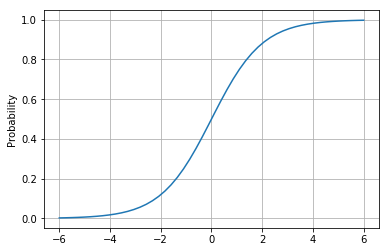

In [2]:
import numpy as np

# Logistic Function
def logistic(x):
    # np.exp(x) raises x to the exponential power, ie e^x. e ~= 2.71828
    return np.exp(x)  / (1 + np.exp(x)) 
    
# Generate 50 real values, evenly spaced, between -6 and 6.
x = np.linspace(-6,6,50, dtype=float)

# Transform each number in t using the logistic function.
y = logistic(x)

# Plot the resulting data.
plt.plot(x, y)
plt.ylabel("Probability")
plt.grid()
plt.show()

###  Training a logistic regression model

In [3]:
from sklearn.linear_model import LogisticRegression
logistic_model = LogisticRegression(solver='lbfgs')
logistic_model.fit(admissions[["gpa"]], admissions["admit"])

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='lbfgs',
          tol=0.0001, verbose=0, warm_start=False)

### Plotting probabilities

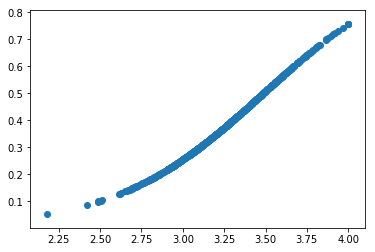

In [4]:
logistic_model.fit(admissions[["gpa"]], admissions["admit"])

pred_probs = logistic_model.predict_proba(admissions[['gpa']])

# plt.scatter(pred_probs, [0, 1])
# plt.show()
plt.scatter(admissions['gpa'], pred_probs[:, 1])
plt.show()

### Predict Labels

In [5]:
logistic_model.fit(admissions[["gpa"]], admissions["admit"])

fitted_labels = logistic_model.predict(admissions[['gpa']])

fitted_labels[:10]

array([0, 0, 0, 0, 0, 1, 0, 0, 1, 1])

# *Introduction to evaluating binary classifiers*

### Introduction to the Data

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression

admissions = pd.read_csv("admissions.csv")
model = LogisticRegression(solver='lbfgs')
model.fit(admissions[["gpa"]], admissions["admit"])

labels = model.predict(admissions[['gpa']])
admissions['predicted_label'] = labels
print(admissions['predicted_label'].value_counts())
admissions.head()

0    507
1    137
Name: predicted_label, dtype: int64


,admit,gpa,gre,predicted_label
0,0,3.177277,594.102992,0
1,0,3.412655,631.528607,0
2,0,2.728097,553.714399,0
3,0,3.093559,551.089985,0
4,0,3.141923,537.184894,0


### Accuracy

In [7]:
admissions['actual_label'] = admissions['admit']
matches = (admissions['actual_label'] == admissions['predicted_label'])
correct_predictions = admissions[matches == True]

accuracy = len(correct_predictions)/len(admissions)
print(accuracy)
correct_predictions.head()

0.6847826086956522


,admit,gpa,gre,predicted_label,actual_label
0,0,3.177277,594.102992,0,0
1,0,3.412655,631.528607,0,0
2,0,2.728097,553.714399,0,0
3,0,3.093559,551.089985,0,0
4,0,3.141923,537.184894,0,0


### Binary classification outcomes

In [8]:
true_positive_filter = admissions[(admissions['predicted_label'] == 1) & (admissions['actual_label'] == 1)]
true_negative_filter = admissions[(admissions['predicted_label'] == 0) & (admissions['actual_label'] == 0)]

true_positives = len(true_positive_filter)
true_negatives = len(true_negative_filter)
print(true_positives)
print(true_negatives)

89
352


### Sensitivity

Sensitivity or True Positive Rate - The proportion of applicants that were correctly admitted:

$$TPR\ or\ Sensitivity = \frac{True Positives}{True Positives+False Negatives}$$

This measure helps us answer the question:
- How effective is this model at identifying positive outcomes?

In [9]:
false_negative_filter = admissions[(admissions['predicted_label'] == 0) & (admissions['actual_label'] == 1)]
false_negatives = len(false_negative_filter)
print(false_negatives)

sensitivity = true_positives/(true_positives + false_negatives)
sensitivity

155


0.36475409836065575

### Specifivity

Specificity or True Negative Rate - The proportion of applicants that were correctly rejected:

$$TNR\ or\ Specificity = \frac{True\ Negatives}{True\ Negatives + False\ Positives}$$

This measure helps us answer the question:
- How effective is this model at identifying negative outcomes?

In [10]:
false_positive_filter = admissions[(admissions['predicted_label'] == 1) & (admissions['actual_label'] == 0)]
false_positives = len(false_positive_filter)
print(false_positives)

specificity = true_negatives/(true_negatives + false_positives)
specificity

48


0.88

# *Multiclass Classification*

### Introduction to the data

In [11]:
import pandas as pd
cars = pd.read_csv("auto.csv")
unique_regions = cars['origin'].unique()
print(unique_regions)

cars.head()

[1 3 2]


,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin
0,18.0,8,307.0,130.0,3504.0,12.0,70,1
1,15.0,8,350.0,165.0,3693.0,11.5,70,1
2,18.0,8,318.0,150.0,3436.0,11.0,70,1
3,16.0,8,304.0,150.0,3433.0,12.0,70,1
4,17.0,8,302.0,140.0,3449.0,10.5,70,1


### Dummy Variables

In [12]:
dummy_cylinders = pd.get_dummies(cars["cylinders"], prefix="cyl")
cars = pd.concat([cars, dummy_cylinders], axis=1)

dummy_years = pd.get_dummies(cars['year'], prefix='year')
cars = pd.concat([cars, dummy_years], axis=1)

cars.drop(['cylinders', 'year'], axis=1, inplace=True)
cars.head()

,mpg,displacement,horsepower,weight,acceleration,origin,cyl_3,cyl_4,cyl_5,cyl_6,...,year_73,year_74,year_75,year_76,year_77,year_78,year_79,year_80,year_81,year_82
0,18.0,307.0,130.0,3504.0,12.0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,15.0,350.0,165.0,3693.0,11.5,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,18.0,318.0,150.0,3436.0,11.0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,16.0,304.0,150.0,3433.0,12.0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,17.0,302.0,140.0,3449.0,10.5,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### Splitting Data

In [13]:
shuffled_rows = np.random.permutation(cars.index)
shuffled_cars = cars.iloc[shuffled_rows].copy()

seperator = int(len(shuffled_cars)*0.7)

train = shuffled_cars[:seperator].copy()
test = shuffled_cars[seperator:].copy()

### Training a Multiclass Logistic Regression model

In [14]:
from sklearn.linear_model import LogisticRegression

unique_origins = cars["origin"].unique()
unique_origins.sort()

models = {}

cols = [c for c in cars.columns if c.startswith('cyl') or c.startswith('year')]


for item in unique_origins:
    model = LogisticRegression(solver='lbfgs')
    
    X_train = train[cols]
    y_train = train['origin'] == item
    
    model.fit(X_train, y_train)
    models[item] = model
    
models

{1: LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
           intercept_scaling=1, max_iter=100, multi_class='warn',
           n_jobs=None, penalty='l2', random_state=None, solver='lbfgs',
           tol=0.0001, verbose=0, warm_start=False),
 2: LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
           intercept_scaling=1, max_iter=100, multi_class='warn',
           n_jobs=None, penalty='l2', random_state=None, solver='lbfgs',
           tol=0.0001, verbose=0, warm_start=False),
 3: LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
           intercept_scaling=1, max_iter=100, multi_class='warn',
           n_jobs=None, penalty='l2', random_state=None, solver='lbfgs',
           tol=0.0001, verbose=0, warm_start=False)}

### Testing the models

In [15]:
testing_probs = pd.DataFrame(columns=unique_origins)

for item in unique_origins:
    testing_probs[item] = models[item].predict_proba(test[cols])[:, 1]
    
testing_probs.head()

,1,2,3
0,0.971577,0.015588,0.029032
1,0.291262,0.338438,0.361372
2,0.974146,0.018564,0.021851
3,0.901857,0.071712,0.043186
4,0.331718,0.263947,0.400582


### Choose the origin

In [16]:
predicted_origins = testing_probs.idxmax(axis=1)
predicted_origins.head()

0    1
1    3
2    1
3    1
4    3
dtype: int64

In [17]:
predict_test = pd.concat([test.reset_index(drop=True), predicted_origins], axis=1, ignore_index=True)
cols = list(test.columns)
cols.append('origin')
predict_test.columns = cols
predict_test.head()

,mpg,displacement,horsepower,weight,acceleration,origin,cyl_3,cyl_4,cyl_5,cyl_6,...,year_74,year_75,year_76,year_77,year_78,year_79,year_80,year_81,year_82,origin
0,14.0,351.0,153.0,4129.0,13.0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,26.0,98.0,79.0,2255.0,17.7,1,0,1,0,0,...,0,0,1,0,0,0,0,0,0,3
2,13.0,302.0,129.0,3169.0,12.0,1,0,0,0,0,...,0,1,0,0,0,0,0,0,0,1
3,21.5,231.0,115.0,3245.0,15.4,1,0,0,0,1,...,0,0,0,0,0,1,0,0,0,1
4,23.2,156.0,105.0,2745.0,16.7,1,0,1,0,0,...,0,0,0,0,1,0,0,0,0,3


# *Overfitting*

### Introduction

In [18]:
import pandas as pd
columns = ["mpg", "cylinders", "displacement", "horsepower", "weight", "acceleration", "model year", "origin", "car name"]
cars = pd.read_csv("auto-mpg.data", names=columns, sep='\s+')
filtered_cars = cars[cars['horsepower'] != '?'].copy()
filtered_cars['horsepower'] = filtered_cars['horsepower'].astype('float')
filtered_cars.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130.0,3504.0,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693.0,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436.0,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433.0,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449.0,10.5,70,1,ford torino


### Bias-variance tradeoff

In [19]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import numpy as np
import matplotlib.pyplot as plt

def train_and_test(cols):
    X = filtered_cars[[cols]]
    y = filtered_cars['mpg']
    
    m = LinearRegression().fit(X, y)
    predictions = m.predict(X)
    
    variance = predictions.var()
    mse = mean_squared_error(predictions, y)
    
    return (mse, variance)

cyl_mse, cyl_var = train_and_test('cylinders')
weight_mse, weight_var = train_and_test('weight')

print(cyl_mse, cyl_var)
print(weight_mse, weight_var)

24.02017956815553 36.74255887416017
18.6766165974193 42.08612184489641


### Multivariate Models

In [20]:
# Our implementation for train_and_test, takes in a list of strings.
def train_and_test(cols):
    # Split into features & target.
    features = filtered_cars[cols]
    target = filtered_cars["mpg"]
    # Fit model.
    lr = LinearRegression()
    lr.fit(features, target)
    # Make predictions on training set.
    predictions = lr.predict(features)
    # Compute MSE and Variance.
    mse = mean_squared_error(filtered_cars["mpg"], predictions)
    variance = np.var(predictions)
    return(mse, variance)
cols = ['cylinders', 'displacement', 'horsepower','weight', 'acceleration', 'model year', 'origin']
one_mse, one_var = train_and_test(cols[:1])
print(one_mse, one_var)

two_mse, two_var = train_and_test(cols[:2])
print(two_mse, two_var)

three_mse, three_var = train_and_test(cols[:3])
print(three_mse, three_var)

four_mse, four_var = train_and_test(cols[:4])
print(four_mse, four_var)

five_mse, five_var = train_and_test(cols[:5])
print(five_mse, five_var)

six_mse, six_var = train_and_test(cols[:6])
print(six_mse, six_var)

seven_mse, seven_var = train_and_test(cols[:7])
print(seven_mse, seven_var)

24.02017956815553 36.74255887416017
21.282057055586364 39.480681386729316
20.25295483971423 40.50978360260148
17.76386057184385 42.998877870471865
17.76139610540622 43.001342336909396
11.590170981415227 49.172567460900346
10.847480945000454 49.915257497315146


### Cross Validation

In [21]:
from sklearn.model_selection import KFold

# Our implementation for train_and_test, takes in a list of strings.
def train_and_cross_val(cols):
    # Split into features & target.
    features = filtered_cars[cols]
    target = filtered_cars["mpg"]
    
    kf = KFold(10, True, 3)
    
    mse_values = []
    var_values = []
    
    for train_index, test_index in kf.split(features):
        
        X_train, X_test = features.iloc[train_index], features.iloc[test_index]
        y_train, y_test = target.iloc[train_index], target.iloc[test_index]

        # Fit model.
        lr = LinearRegression()
        lr.fit(X_train, y_train)
        predictions = lr.predict(X_test)
        # Compute MSE and Variance.
        mse = mean_squared_error(y_test, predictions)
        variance = np.var(predictions)
        
        mse_values.append(mse)
        var_values.append(variance)
        
    return(np.mean(mse_values), np.mean(var_values))

cols = ['cylinders', 'displacement', 'horsepower','weight', 'acceleration', 'model year', 'origin']

two_mse, two_var = train_and_cross_val(cols[:2])
print(two_mse, two_var)

three_mse, three_var = train_and_cross_val(cols[:3])
print(three_mse, three_var)

four_mse, four_var = train_and_cross_val(cols[:4])
print(four_mse, four_var)

five_mse, five_var = train_and_cross_val(cols[:5])
print(five_mse, five_var)

six_mse, six_var = train_and_cross_val(cols[:6])
print(six_mse, six_var)

seven_mse, seven_var = train_and_cross_val(cols[:7])
print(seven_mse, seven_var)

21.584370274954374 38.90252531375602
20.655622193882955 40.09128795660694
18.169683239081884 42.507643643644386
18.283038517172052 42.59873630014678
12.099685425467118 48.92824696771803
11.418131971812054 49.90431373098729


### Plotting cross-validation error vs. cross-validation variance

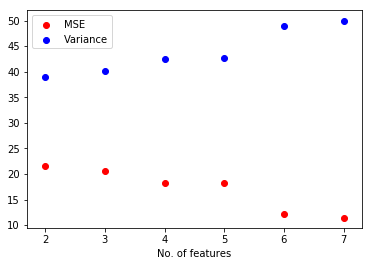

In [22]:
feature_num = []
mse_num = []
var_num = []

for i in range(2, 8):
    mse, var = train_and_cross_val(cols[:i])
    feature_num.append(i)
    mse_num.append(mse)
    var_num.append(var)

plt.scatter(feature_num, mse_num, c='red', label='MSE')
plt.scatter(feature_num, var_num, c='blue', label='Variance')
plt.xlabel('No. of features')
plt.legend()
plt.show()

# *Clustering Basics*
### The dataset

In [23]:
import pandas as pd
votes = pd.read_csv('114_congress.csv')
votes.head()

,name,party,state,00001,00004,00005,00006,00007,00008,00009,00010,00020,00026,00032,00038,00039,00044,00047
0,Alexander,R,TN,0.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0
1,Ayotte,R,NH,0.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
2,Baldwin,D,WI,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0
3,Barrasso,R,WY,0.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0
4,Bennet,D,CO,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0


### Exploring the data

In [24]:
print(votes['party'].value_counts())

bill_cols = votes.columns[3:]
votes[bill_cols].mean()

R    54
D    44
I     2
Name: party, dtype: int64


00001    0.325
00004    0.575
00005    0.535
00006    0.945
00007    0.545
00008    0.415
00009    0.545
00010    0.985
00020    0.525
00026    0.545
00032    0.410
00038    0.480
00039    0.510
00044    0.460
00047    0.370
dtype: float64

### Distance Between Senators

In [25]:
from sklearn.metrics.pairwise import euclidean_distances

distance = euclidean_distances(votes.iloc[0, 3:].values.reshape(1, -1), votes.iloc[2, 3:].values.reshape(1, -1))

### Initial Clustering

In [26]:
from sklearn.cluster import KMeans

kmeans_model = KMeans(n_clusters=2, random_state=1)
senator_distances = kmeans_model.fit_transform(votes.iloc[:, 3:])
senator_distances[:5]

array([[3.12141628, 1.3134775 ],
       [2.6146248 , 2.05339992],
       [0.33960656, 3.41651746],
       [3.42004795, 0.24198446],
       [1.43833966, 2.96866004]])

### Exploring the Clusters

In [27]:
labels = kmeans_model.labels_
party = votes['party'].values

clusters = pd.crosstab(labels, party, rownames=['Labels'], colnames=['Party'])
clusters

Party,D,I,R
Labels,,,
0,41,2,0
1,3,0,54


### Exploring Senators in the wrong cluster

In [28]:
votes[(labels == 1) & (party=='D')]

,name,party,state,00001,00004,00005,00006,00007,00008,00009,00010,00020,00026,00032,00038,00039,00044,00047
42,Heitkamp,D,ND,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
56,Manchin,D,WV,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0
74,Reid,D,NV,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5


### Plotting out the Clusters

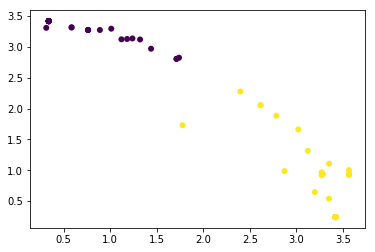

In [29]:
plt.scatter(senator_distances[:, 0], senator_distances[:, 1], c=labels, linewidths=0)
plt.show()

### Finding the most extreme

In [30]:
extremism = np.sum(senator_distances ** 3, axis=1)
votes['extremism'] = extremism

votes.sort_values(by='extremism', ascending=False, inplace=True)
votes.head(10)

,name,party,state,00001,00004,00005,00006,00007,00008,00009,00010,00020,00026,00032,00038,00039,00044,00047,extremism
98,Wicker,R,MS,0.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,46.250476
53,Lankford,R,OK,0.0,1.0,1.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,46.046873
69,Paul,R,KY,0.0,1.0,1.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,46.046873
80,Sasse,R,NE,0.0,1.0,1.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,46.046873
26,Cruz,R,TX,0.0,1.0,1.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,46.046873
48,Johnson,R,WI,0.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,40.017540
47,Isakson,R,GA,0.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,40.017540
65,Murkowski,R,AK,0.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,40.017540
64,Moran,R,KS,0.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,40.017540
30,Enzi,R,WY,0.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,40.017540


# *K-means Clustering*

### Clustering NBA Players

In [31]:
import pandas as pd
import numpy as np

nba = pd.read_csv('nba_2013.csv')
nba.head()

,player,pos,age,bref_team_id,g,gs,mp,fg,fga,fg.,...,drb,trb,ast,stl,blk,tov,pf,pts,season,season_end
0,Quincy Acy,SF,23,TOT,63,0,847,66,141,0.468,...,144,216,28,23,26,30,122,171,2013-2014,2013
1,Steven Adams,C,20,OKC,81,20,1197,93,185,0.503,...,190,332,43,40,57,71,203,265,2013-2014,2013
2,Jeff Adrien,PF,27,TOT,53,12,961,143,275,0.520,...,204,306,38,24,36,39,108,362,2013-2014,2013
3,Arron Afflalo,SG,28,ORL,73,73,2552,464,1011,0.459,...,230,262,248,35,3,146,136,1330,2013-2014,2013
4,Alexis Ajinca,C,25,NOP,56,30,951,136,249,0.546,...,183,277,40,23,46,63,187,328,2013-2014,2013


### Point Guards

In [32]:
point_guards = nba[nba['pos'] == 'PG'].copy()
point_guards.head()

,player,pos,age,bref_team_id,g,gs,mp,fg,fga,fg.,...,drb,trb,ast,stl,blk,tov,pf,pts,season,season_end
24,D.J. Augustin,PG,26,TOT,71,9,1939,298,718,0.415,...,115,130,313,53,3,125,147,930,2013-2014,2013
29,Leandro Barbosa,PG,31,PHO,20,0,368,56,131,0.427,...,32,37,32,7,4,19,30,150,2013-2014,2013
30,Jose Barea,PG,29,MIN,79,1,1471,254,656,0.387,...,138,154,303,26,0,125,129,660,2013-2014,2013
38,Jerryd Bayless,PG,25,TOT,72,19,1686,248,617,0.402,...,123,145,194,60,9,82,161,666,2013-2014,2013
50,Steve Blake,PG,33,TOT,55,28,1498,133,353,0.377,...,146,159,307,54,8,102,85,378,2013-2014,2013


### Points Per Game

In [33]:
point_guards['ppg'] = point_guards['pts']/point_guards['g']
point_guards[['pts', 'g', 'ppg']].head()

,pts,g,ppg
24,930,71,13.098592
29,150,20,7.500000
30,660,79,8.354430
38,666,72,9.250000
50,378,55,6.872727


### Assist Turnover Ratio

In [34]:
point_guards = point_guards[point_guards['tov'] != 0]

point_guards['atr'] = point_guards['ast']/point_guards['tov']

# Sanity check, make sure atr = ast/tov
point_guards[['ast', 'tov', 'atr']].head()

,ast,tov,atr
24,313,125,2.504000
29,32,19,1.684211
30,303,125,2.424000
38,194,82,2.365854
50,307,102,3.009804


### Visualizing the Point Guards

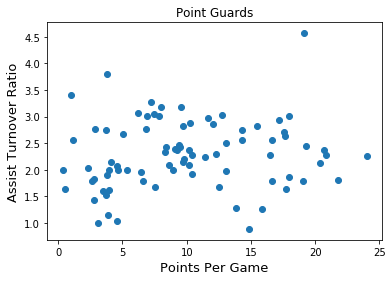

In [35]:
plt.scatter(point_guards['ppg'], point_guards['atr'])
plt.title("Point Guards")
plt.xlabel('Points Per Game', fontsize=13)
plt.ylabel('Assist Turnover Ratio', fontsize=13)
plt.show()

### The Algorithm

In [39]:
num_clusters = 5
random_initial_points = np.random.choice(point_guards.index, size=5)

centroids = point_guards.loc[random_initial_points]
centroids

,player,pos,age,bref_team_id,g,gs,mp,fg,fga,fg.,...,ast,stl,blk,tov,pf,pts,season,season_end,ppg,atr
423,Isaiah Thomas,PG,24,SAC,72,54,2497,496,1096,0.453,...,454,93,8,213,185,1465,2013-2014,2013,20.347222,2.131455
85,Michael Carter-Williams,PG,22,PHI,70,70,2414,427,1054,0.405,...,441,130,43,247,213,1167,2013-2014,2013,16.671429,1.785425
343,Jannero Pargo,PG,34,CHA,29,0,242,52,118,0.441,...,52,14,1,26,17,136,2013-2014,2013,4.689655,2.000000
272,Damian Lillard,PG,23,POR,82,82,2937,553,1304,0.424,...,457,64,22,193,197,1695,2013-2014,2013,20.670732,2.367876
420,Jason Terry,PG,36,BRK,35,0,570,55,152,0.362,...,56,13,0,27,48,159,2013-2014,2013,4.542857,2.074074


### Visualizing Centroids

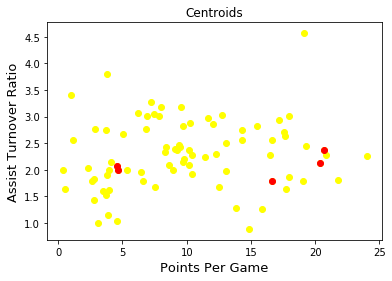

In [40]:
plt.scatter(point_guards['ppg'], point_guards['atr'], c='Yellow')
plt.scatter(centroids['ppg'], centroids['atr'], c='Red')
plt.title("Centroids")
plt.xlabel('Points Per Game', fontsize=13)
plt.ylabel('Assist Turnover Ratio', fontsize=13)
plt.show()

### Setup (continued)

In [64]:
def centroids_to_dict(centroids):
    centroid_dict = {}
    counter = 0
    
    for index, row in centroids.iterrows():
        cluster_id = counter
        coordinates = [row['ppg'], row['atr']]
        
        centroid_dict[cluster_id] = coordinates
        counter += 1
    
    return centroid_dict
        
centroids_dict = centroids_to_dict(centroids)     
centroids_dict

{0: [20.34722222222222, 2.131455399061033],
 1: [16.67142857142857, 1.785425101214575],
 2: [4.689655172413793, 2.0],
 3: [20.670731707317074, 2.3678756476683938],
 4: [4.542857142857143, 2.074074074074074]}

### Step 1 (Euclidean Distance)

In [65]:
import math

def calculate_distance(centroid, player_values):
    root_distance = 0
    
    for x in range(0, len(centroid)):
        difference = centroid[x] - player_values[x]
        squared_difference = difference**2
        root_distance += squared_difference

    euclid_distance = math.sqrt(root_distance)
    return euclid_distance

q = [5, 2]
p = [3,1]

# Sqrt(5) = ~2.24
print(calculate_distance(q, p))

2.23606797749979


### Step 1 (Continued)

In [74]:
# Add the function, `assign_to_cluster`
def assign_to_cluster(row):
    distances = []
#     for i in range(len(centroids_dict)):
#         difference_1 = (centroids_dict[i+1][0] - row['ppg'])**2
#         difference_2 = (centroids_dict[i+1][1] - row['atr'])**2
#         total_distance = math.sqrt(difference_1 + difference_2)
#         distances.append(total_distance)
        
#     return np.array(distances).argmin()
    df_row = [row['ppg'], row['atr']]
    for k,v in centroids_dict.items():
        d = calculate_distance(v, df_row)
        distances.append(d)
        
    return np.array(distances).argmin()       


# This creates the column, `cluster`, by applying assign_to_cluster row-by-row
# Uncomment when ready

point_guards['cluster'] = point_guards.apply(lambda row: assign_to_cluster(row), axis=1)

### Visualizing Clusters

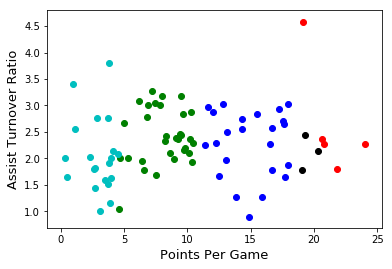

In [76]:
# Visualizing clusters
def visualize_clusters(df, num_clusters):
    colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k']

    for n in range(num_clusters):
        clustered_df = df[df['cluster'] == n]
        plt.scatter(clustered_df['ppg'], clustered_df['atr'], c=colors[n-1])
        plt.xlabel('Points Per Game', fontsize=13)
        plt.ylabel('Assist Turnover Ratio', fontsize=13)
    plt.show()

visualize_clusters(point_guards, 5)

### Step 2

In [81]:
def recalculate_centroids(df):
    new_centroids_dict = dict()
    # 0..1...2...3...4
    for cluster_id in range(0, num_clusters):
        # Finish the logic
        df_cluster = df[df['cluster']==cluster_id]
        new_centroid = [np.average(df_cluster['ppg']), np.average(df_cluster['atr'])]
        new_centroids_dict[cluster_id] = new_centroid 
    return new_centroids_dict

centroids_dict = recalculate_centroids(point_guards)
centroids_dict

### Repeat Step 1

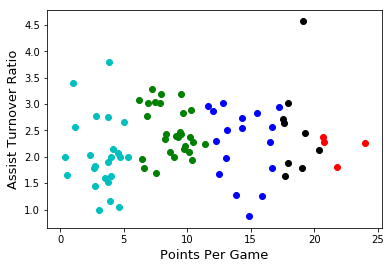

In [85]:
point_guards['cluster'] = point_guards.apply(lambda row: assign_to_cluster(row), axis=1)
visualize_clusters(point_guards, 5)

### Repeat Step 2 and Step 1

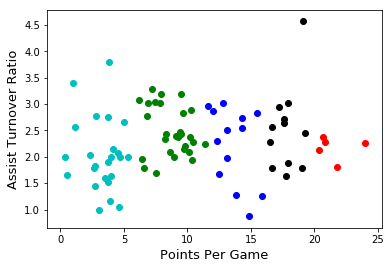

In [86]:
centroids_dict = recalculate_centroids(point_guards)
point_guards['cluster'] = point_guards.apply(lambda row: assign_to_cluster(row), axis=1)
visualize_clusters(point_guards, num_clusters)

### Challenges of K-Means

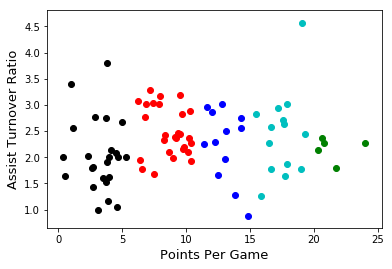

In [91]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=num_clusters)
kmeans.fit(point_guards[['ppg', 'atr']])
point_guards['cluster'] = kmeans.labels_

visualize_clusters(point_guards, num_clusters)